In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/RUTH/Downloads/carwash_daily_2025-06-17_to_2025-07-18.csv")
df.head()

,Date,DayOfWeek,Season,PublicHoliday,WorkingHours,Casuals,Referrals,Motorbike,Small_Car,Big_Car,Small_PSV,Big_PSV,Tractor,Small_Lorry,Tipper,Excavator,Carpet_sqm,Total_Customers,Total_Revenue
0,6/17/2025,Tuesday,Sunny,No,12,1,2,3,1,0,1,0,0,0,0,0,0,5,950
1,6/18/2025,Wednesday,Sunny,No,11,2,0,3,2,1,1,0,0,0,1,0,0,8,2600
2,6/19/2025,Thursday,Cold,No,11,1,2,2,2,0,0,0,0,1,1,1,0,7,3800
3,6/20/2025,Friday,Cold,No,11,1,2,1,1,0,0,0,0,1,0,1,0,4,2450
4,6/21/2025,Saturday,Cold,No,12,2,0,3,1,2,1,1,0,0,0,0,8,8,2690


In [5]:
df.describe()

,WorkingHours,Casuals,Referrals,Motorbike,Small_Car,Big_Car,Small_PSV,Big_PSV,Tractor,Small_Lorry,Tipper,Excavator,Carpet_sqm,Total_Customers,Total_Revenue
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000
mean,11.125000,1.531250,1.093750,2.718750,1.375000,1.000000,0.500000,0.156250,0.218750,0.625000,0.312500,0.093750,2.718750,7.000000,2433.12500
std,1.560604,0.717719,0.962503,1.250403,0.975506,0.950382,0.622171,0.368902,0.420013,0.870669,0.470929,0.296145,7.185264,2.125119,953.30812
min,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,900.00000
25%,11.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1775.00000
50%,12.000000,1.000000,1.000000,2.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2395.00000
75%,12.000000,2.000000,2.000000,3.250000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,8.000000,3312.50000
max,12.000000,3.000000,3.000000,5.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,28.000000,11.000000,4330.00000


In [9]:
X = df.drop(columns = ["Date","Total_Revenue"], axis = 1)
Y = df["Total_Revenue"]

In [19]:
categorical_features = ["DayOfWeek","Season","PublicHoliday"]

In [21]:
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

In [23]:
X.head()

,WorkingHours,Casuals,Referrals,Motorbike,Small_Car,Big_Car,Small_PSV,Big_PSV,Tractor,Small_Lorry,...,Carpet_sqm,Total_Customers,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Season_Sunny,PublicHoliday_Yes
0,12,1,2,3,1,0,1,0,0,0,...,0,5,False,False,False,False,True,False,True,False
1,11,2,0,3,2,1,1,0,0,0,...,0,8,False,False,False,False,False,True,True,False
2,11,1,2,2,2,0,0,0,0,1,...,0,7,False,False,False,True,False,False,False,False
3,11,1,2,1,1,0,0,0,0,1,...,0,4,False,False,False,False,False,False,False,False
4,12,2,0,3,1,2,1,1,0,0,...,8,8,False,True,False,False,False,False,False,False


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
# Train model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [31]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 3.52865491e-13  3.58942135e-13  3.29186131e-13 -3.80000000e+02
 -2.30000000e+02 -8.00000000e+01 -3.30000000e+02  7.00000000e+01
  1.70000000e+02 -3.00000000e+01  3.70000000e+02  9.70000000e+02
  3.00000000e+01  5.30000000e+02 -3.71373825e-13 -8.55680900e-13
  2.66156688e-12  7.12780985e-14 -8.42359595e-13 -4.01060369e-13
 -7.17672309e-13  4.28971684e-14]
Intercept: -1.4097167877480388e-11


In [33]:
X.corr()

,WorkingHours,Casuals,Referrals,Motorbike,Small_Car,Big_Car,Small_PSV,Big_PSV,Tractor,Small_Lorry,...,Carpet_sqm,Total_Customers,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Season_Sunny,PublicHoliday_Yes
WorkingHours,1.000000,0.197999,0.099324,-0.047526,-0.031784,-1.087471e-01,6.644555e-02,7.704373e-02,-0.190702,0.106833,...,-0.140601,-7.781306e-02,0.153792,1.537916e-01,-9.535077e-01,0.133076,0.189107,0.077044,-0.101732,1.023125e-01
Casuals,0.197999,1.000000,-0.074422,0.028082,0.120944,1.891671e-01,1.805984e-01,1.637160e-01,-0.076913,0.329087,...,0.086204,3.172428e-01,0.117041,1.170411e-01,-1.504815e-01,-0.079954,0.163716,-0.201789,-0.264865,1.191791e-01
Referrals,0.099324,-0.074422,1.000000,0.076222,-0.004295,-7.052908e-02,2.693374e-02,-1.334361e-01,-0.052365,0.312757,...,0.120545,1.734786e-01,-0.037404,1.620827e-01,-1.371469e-01,0.048264,0.048264,0.048264,0.067282,-2.073621e-01
Motorbike,-0.047526,0.028082,0.076222,1.000000,-0.122312,-5.429003e-02,6.219704e-02,-4.152224e-02,-0.124764,0.018519,...,0.421762,4.855848e-01,0.316708,-6.718048e-02,8.637491e-02,-0.251319,0.028410,0.168274,0.218856,-1.048917e-01
Small_Car,-0.031784,0.120944,-0.004295,-0.122312,1.000000,3.479445e-02,-1.062988e-01,1.008439e-01,0.344447,0.170910,...,-0.154749,5.290587e-01,-0.049207,4.920678e-02,4.920678e-02,-0.078434,-0.257712,0.190483,-0.008566,1.169131e-01
Big_Car,-0.108747,0.189167,-0.070529,-0.054290,0.034794,1.000000e+00,-3.634058e-17,-1.532253e-17,0.000000,-0.077968,...,0.151164,3.194383e-01,0.101015,5.607473e-18,1.010153e-01,0.276026,-0.276026,-0.092009,-0.070338,1.920061e-01
Small_PSV,0.066446,0.180598,0.026934,0.062197,-0.106299,-3.634058e-17,1.000000e+00,-2.108185e-01,-0.185164,0.059549,...,-0.068550,2.927700e-01,0.154303,-4.282778e-18,5.995890e-17,0.070273,0.070273,-0.070273,-0.161165,-1.466471e-01
Big_PSV,0.077044,0.163716,-0.133436,-0.041522,0.100844,-1.532253e-17,-2.108185e-01,1.000000e+00,-0.227710,0.087878,...,-0.068075,4.114756e-02,-0.162650,3.578300e-01,-1.626500e-01,-0.185185,0.051852,0.288889,0.050965,-7.728982e-02
Tractor,-0.190702,-0.076913,-0.052365,-0.124764,0.344447,0.000000e+00,-1.851640e-01,-2.277100e-01,1.000000,-0.121290,...,0.224133,1.445613e-01,-0.200000,-2.000000e-01,2.571429e-01,-0.019518,-0.227710,0.188674,0.094499,-9.503819e-02
Small_Lorry,0.106833,0.329087,0.312757,0.018519,0.170910,-7.796812e-02,5.954913e-02,8.787842e-02,-0.121290,1.000000,...,0.142444,4.358550e-01,-0.055132,3.859225e-01,-5.513178e-02,-0.012554,-0.213419,-0.012554,-0.297514,7.859438e-02


In [35]:
y_pred = model.predict(X_test)

In [37]:
y_pred

array([3300., 3440., 1900.,  900., 1950., 3400., 1950.])

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

r2 = r2_score(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

print("Model Performance:")
print("R²:", round(r2, 3))
print("RMSE:", round(rmse, 3))

Model Performance:
R²: 1.0
RMSE: 0.0


In [43]:
print(X.columns)


Index(['WorkingHours', 'Casuals', 'Referrals', 'Motorbike', 'Small_Car',
       'Big_Car', 'Small_PSV', 'Big_PSV', 'Tractor', 'Small_Lorry', 'Tipper',
       'Excavator', 'Carpet_sqm', 'Total_Customers', 'DayOfWeek_Monday',
       'DayOfWeek_Saturday', 'DayOfWeek_Sunday', 'DayOfWeek_Thursday',
       'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'Season_Sunny',
       'PublicHoliday_Yes'],
      dtype='object')


In [59]:
import numpy as np

df["Total_Revenue"] = df["Total_Revenue"] * (1 + np.random.uniform(-0.05, 0.05, size=len(df)))
df["total_revenue"] = df["Total_Revenue"].round().astype(int)


In [61]:
df.head()

,Date,DayOfWeek,Season,PublicHoliday,WorkingHours,Casuals,Referrals,Motorbike,Small_Car,Big_Car,...,Big_PSV,Tractor,Small_Lorry,Tipper,Excavator,Carpet_sqm,Total_Customers,Total_Revenue,Total_revenue,total_revenue
0,6/17/2025,Tuesday,Sunny,No,12,1,2,3,1,0,...,0,0,0,0,0,0,5,909.298639,897,909
1,6/18/2025,Wednesday,Sunny,No,11,2,0,3,2,1,...,0,0,0,1,0,0,8,2567.011098,2656,2567
2,6/19/2025,Thursday,Cold,No,11,1,2,2,2,0,...,0,0,1,1,1,0,7,3663.087592,3735,3663
3,6/20/2025,Friday,Cold,No,11,1,2,1,1,0,...,0,0,1,0,1,0,4,2243.745703,2252,2244
4,6/21/2025,Saturday,Cold,No,12,2,0,3,1,2,...,1,0,0,0,0,8,8,2827.573863,2655,2828


In [63]:
x = df.drop(columns = ["Date","Total_Revenue"], axis = 1)
y = df["Total_Revenue"]

In [65]:
categorical_features = ["DayOfWeek","Season","PublicHoliday"]

In [67]:
x = pd.get_dummies(x, columns=categorical_features, drop_first=True)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [71]:
# Train model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [73]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-1.56013592e-01  1.48720738e-02 -7.99005567e-02  4.34139799e-01
  5.99208381e-01  2.56630555e-02  4.60066044e-01 -3.31898307e-01
 -4.92877796e-01  3.41518511e-01 -4.59420886e-01 -1.56075740e+00
 -2.15374697e-02 -9.84358604e-01 -3.19337172e-04  1.00187373e+00
  1.13076996e+00  7.15224441e-01 -1.14264453e-02  5.59885093e-01
  8.97465016e-01  3.76358306e-01  4.45594266e-01 -6.59625453e-01]
Intercept: 2.27391441208556


In [75]:
y_pred = model.predict(X_test)
y_pred

array([2957.73216931, 2861.50296834, 1801.46783349,  889.18110153,
       2023.73400633, 3430.03568536, 1847.55237116])

In [77]:
r2 = r2_score(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

print("Model Performance:")
print("R²:", round(r2, 3))
print("RMSE:", round(rmse, 3))

Model Performance:
R²: 1.0
RMSE: 1.02


In [79]:
df.head()

,Date,DayOfWeek,Season,PublicHoliday,WorkingHours,Casuals,Referrals,Motorbike,Small_Car,Big_Car,...,Big_PSV,Tractor,Small_Lorry,Tipper,Excavator,Carpet_sqm,Total_Customers,Total_Revenue,Total_revenue,total_revenue
0,6/17/2025,Tuesday,Sunny,No,12,1,2,3,1,0,...,0,0,0,0,0,0,5,909.298639,897,909
1,6/18/2025,Wednesday,Sunny,No,11,2,0,3,2,1,...,0,0,0,1,0,0,8,2567.011098,2656,2567
2,6/19/2025,Thursday,Cold,No,11,1,2,2,2,0,...,0,0,1,1,1,0,7,3663.087592,3735,3663
3,6/20/2025,Friday,Cold,No,11,1,2,1,1,0,...,0,0,1,0,1,0,4,2243.745703,2252,2244
4,6/21/2025,Saturday,Cold,No,12,2,0,3,1,2,...,1,0,0,0,0,8,8,2827.573863,2655,2828


In [103]:
X = df[["DayOfWeek","Season","PublicHoliday","WorkingHours","Casuals","Referrals","Total_Customers"]]

In [105]:
Y = df["Total_Revenue"]

In [107]:
categorical_features = ["DayOfWeek","Season","PublicHoliday"]
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [111]:
X.head()

,WorkingHours,Casuals,Referrals,Total_Customers,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Season_Sunny,PublicHoliday_Yes
0,12,1,2,5,False,False,False,False,True,False,True,False
1,11,2,0,8,False,False,False,False,False,True,True,False
2,11,1,2,7,False,False,False,True,False,False,False,False
3,11,1,2,4,False,False,False,False,False,False,False,False
4,12,2,0,8,False,True,False,False,False,False,False,False


In [113]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [115]:
y_pred = model.predict(X_test)
y_pred

array([3019.53884387, 2629.64623148, 2159.18241204, 1757.84704519,
       2514.99758472, 3995.10468611, 2304.90533775])

In [117]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ -34.91629739   86.22522653   74.78247207  315.11014032 -199.48110749
 -386.18781904 -103.54611371  110.80662832 -833.45212411  -19.98657183
 -518.21974732 -175.69760855]
Intercept: 830.1768260470503


In [119]:
r2 = r2_score(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

print("Model Performance:")
print("R²:", round(r2, 3))
print("RMSE:", round(rmse, 3))

Model Performance:
R²: 0.624
RMSE: 493.521


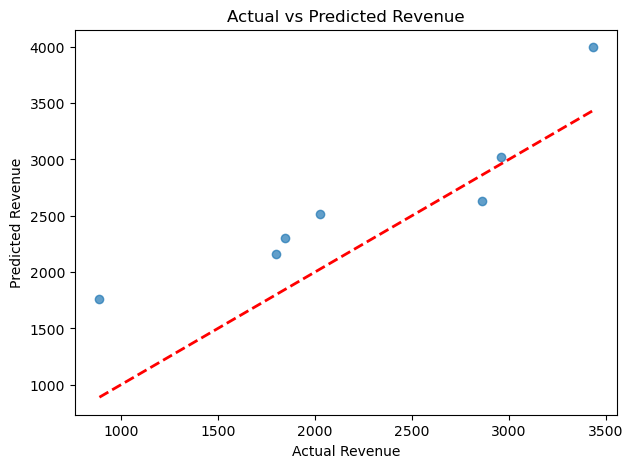

In [121]:
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Scatter plot: actual vs predicted
plt.figure(figsize=(7,5))
plt.scatter(Y_test, y_pred, alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.show()

## Model Performance
-*R² Score* 0.624  
  (The model explains about 62% of the variance in carwash revenue
     **RM:** 493.521  
  (On average, the predictions are off by about KES 494.)

## Key Findings
1. The Linear Regression model predicted daily carwash revenue with moderate accuracy.  . The **Actual vs Predicted Reven chart** shows predictions generally follow the actual trend.  
3. Revenue variations are influenced by certain days (weekends tended to be higher).  

### Conclusion
The project demonstrated how machine learning can be applied to forecast carwash sales.  
While the model achieved 62% accuracy, improvements could be made by including more features (e.g., weather, promotions, special events).  
This approach helps the carwash anticipate demand and optimize resource allocation.